# Forecasting and Data Exploration in Python/Jupyter

## Table of Contents
1. [Introduction](#introduction)
2. [Data Exploration](#data_exploration)<br>
   2.1. [Holiday_Flag and Weekly_Sales](#holiday_sales)<br>
   2.2. [Temperature and Weekly_Sales](#temp_sales)<br>
   2.3. [Fuel_Price and Weekly_Sales](#fuel_sales)<br>
   2.4. [CPI and Weekly_Sales](#cpi_sales)<br>
   2.5. [Uemployment and Weekly_Sales](#unemp_sales)<br>
   2.6. [Summary of Exploration](#sum_explor)
3. [Defining Mean Absolute Percent Deviation for Forecasts](#mapd_def)
4. [Simple Moving Average](#sma)<br>
5. [Weighted Moving Average](#wma)<br>
7. [Exponentially Weighted Mean](#ewm)<br>
8. [Summary](#sum)

## 1. Introduction <a name="introduction"></a>

Much of data analysis in business and in other disiplines go beyond using Microsoft Excel and its limitations by employing a programming language such as Python or R. As Python is a general purpose programming language it enjoys an audience well beyond the domain of data science, making it more appealing for those who wish to possibly use it for more than data science activities.<br>

In this notebook we will explore some sales data from Walmart (https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data). During the exploration process we will look at sales data and how some of the variables/features might be related.<br>

After the data exploration process is finished we will proceed to employ some simple and well known forecast techniques used in business including simple moving average, weighted moving average, exponentially weighted mean. The different techniques will then be compared to each other using mean absolute percentage deviation (MAPE).

In [1]:
#import the libraries we will use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#set the format of numbers to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format 

In [2]:
#read the csv file into a dataframe object called data
data = pd.read_csv('Walmart_Store_sales.csv', parse_dates = [1])

#show the last bit of data to get an idea of how many entries and stores there are
data.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,2012-09-28,713173.95,0,64.88,4.00,192.01,8.68
6431,45,2012-05-10,733455.07,0,64.89,3.98,192.17,8.67
6432,45,2012-12-10,734464.36,0,54.47,4.00,192.33,8.67
6433,45,2012-10-19,718125.53,0,56.47,3.97,192.33,8.67
6434,45,2012-10-26,760281.43,0,58.85,3.88,192.31,8.67


There are 45 stores in total. To keep this notebook short and to focus on the analysis process we will just focus on store # 1.

In [3]:
#check if there are any missing values
data.isna().any().any()

False

Above we have imported the necessary libraries, imported the csv file for walmart sales data, viewed the last values of the data and did a check to see if there are any missing values--there are no missing values in this data set.

In [34]:
#For simplicity we will only use store 1 data
store_one= data.loc[data['Store'] == 1]
store_one.head(150)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.57,211.10,8.11
1,1,2010-12-02,1641957.44,1,38.51,2.55,211.24,8.11
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11
4,1,2010-05-03,1554806.68,0,46.50,2.62,211.35,8.11
...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.67,222.98,6.91
139,1,2012-05-10,1670785.97,0,68.55,3.62,223.18,6.57
140,1,2012-12-10,1573072.81,0,62.99,3.60,223.38,6.57
141,1,2012-10-19,1508068.77,0,67.97,3.59,223.43,6.57


In [5]:
store_one = store_one.drop('Store', axis = 1)

## 2. Data Exploration<a name='data_exploration'></a>

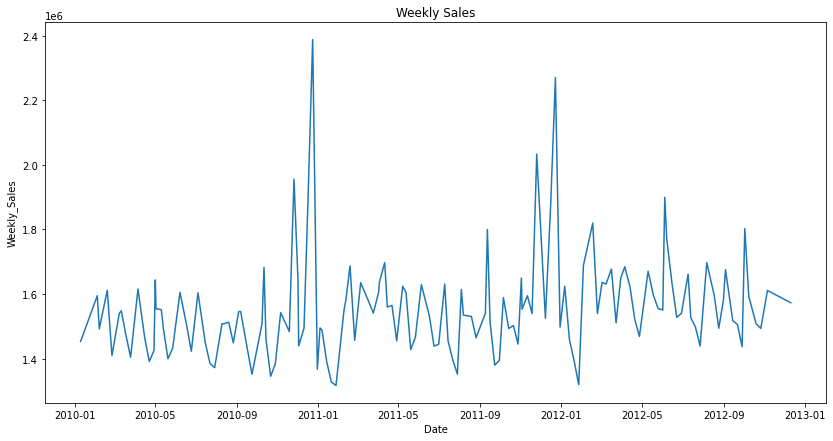

In [36]:
plt.figure(figsize = (14, 7))
sns.lineplot(data = store_one, x = 'Date', y = 'Weekly_Sales')
plt.title('Weekly Sales');

In [37]:
#Plot weekly sales to find a seasonal period
weekly_sales = list(store_one["Weekly_Sales"])

The seasonal cycle occurs about every 52 weeks (i.e. yearly).

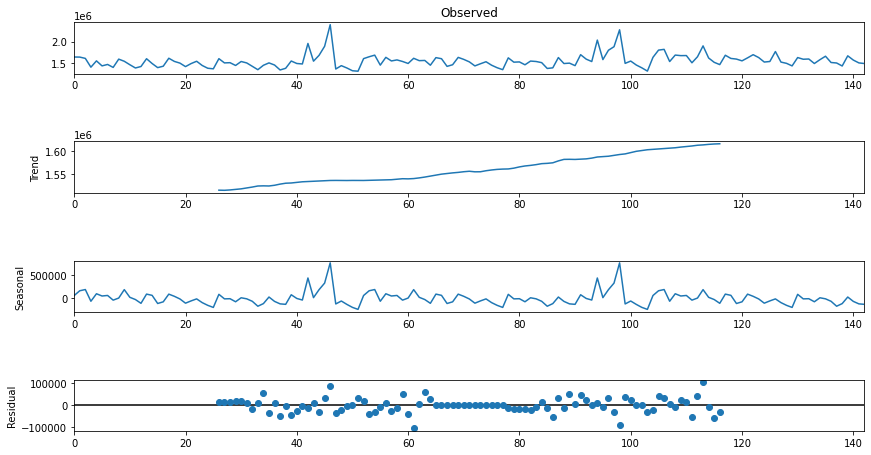

In [7]:
#Decompose the data into observed, trend, seasonal and residual components
def seasonal_decompose(weekly_sales):
    decomposition = sm.tsa.seasonal_decompose(weekly_sales, model = 'additive', period = 52 )
    fig = decomposition.plot()
    fig.set_size_inches(14, 7)
    plt.show()
    
seasonal_decompose(weekly_sales)    

In [8]:
store_one.corr().style.background_gradient(cmap = "Blues")

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,0.194905,-0.222701,0.124592,0.225408,-0.097955
Holiday_Flag,0.194905,1.000000,-0.200543,-0.085903,-0.028919,0.082949
Temperature,-0.222701,-0.200543,1.000000,0.228493,0.118503,-0.180695
Fuel_Price,0.124592,-0.085903,0.228493,1.000000,0.755259,-0.513944
CPI,0.225408,-0.028919,0.118503,0.755259,1.000000,-0.813471
Unemployment,-0.097955,0.082949,-0.180695,-0.513944,-0.813471,1.000000


### 2.1. Holiday_Flag and Weekly_Sales:<a name='holiday_sales'></a>

In [9]:
store_one[['Holiday_Flag', 'Weekly_Sales']].corr()

,Holiday_Flag,Weekly_Sales
Holiday_Flag,1.00,0.19
Weekly_Sales,0.19,1.00


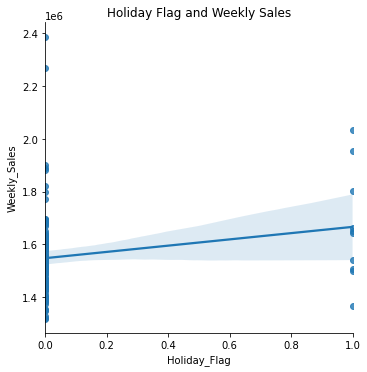

In [10]:
#Plot scatterplot with trendline.
sns.lmplot(data = store_one, x = 'Holiday_Flag', y = 'Weekly_Sales')
plt.title("Holiday Flag and Weekly Sales");

The correlation between the `Holiday_Flag` and `Weekly_Sales` is about 0.19, which indicates a weak positive correlation.  

### 2.2. Temperature and Weekly_Sales:<a name='temp_sales'></a>

In [11]:
store_one[['Temperature', 'Weekly_Sales']].corr()

,Temperature,Weekly_Sales
Temperature,1.00,-0.22
Weekly_Sales,-0.22,1.00


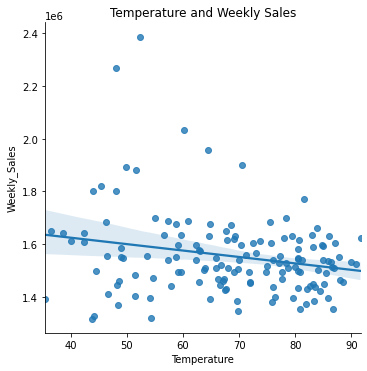

In [12]:
#Plot scatterplot with trendline.
sns.lmplot(data = store_one, x = 'Temperature', y = 'Weekly_Sales')
plt.title("Temperature and Weekly Sales");

The correlation coefficent between `Temperature` and `Weekly_Sales` is about -0.22 which is a weak negative correlation.

### 2.3. Fuel_Price and Weekly_Sales:<a name='fuel_sales'></a>

In [13]:
store_one[['Fuel_Price', "Weekly_Sales"]].corr()

,Fuel_Price,Weekly_Sales
Fuel_Price,1.00,0.12
Weekly_Sales,0.12,1.00


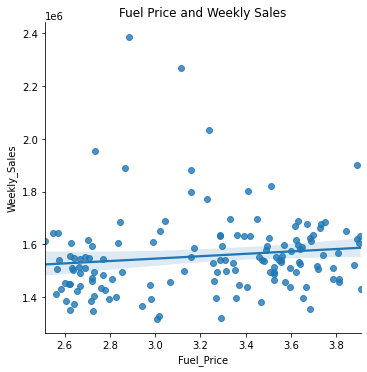

In [38]:
#Plot scatterplot with trendline.
sns.lmplot(data = store_one, x = 'Fuel_Price', y = 'Weekly_Sales')
plt.title("Fuel Price and Weekly Sales");

The correlation coefficient between `Fuel_Price` and `Weekly_Sales` is about 0.12 which is a very weak positive correlation.

### 2.4. CPI and Weekly_Sales:<a name='cpi_sales'></a>

In [15]:
store_one[['CPI', 'Weekly_Sales']].corr()

,CPI,Weekly_Sales
CPI,1.00,0.23
Weekly_Sales,0.23,1.00


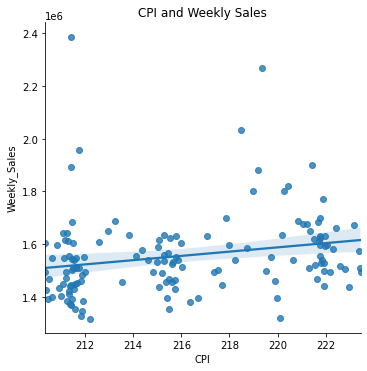

In [39]:
#Plot scatterplot with trendline.
sns.lmplot(data = store_one, x = 'CPI', y = 'Weekly_Sales')
plt.title("CPI and Weekly Sales");

The correlation coefficient between `CPI` and `Weekly_Sales` is about 0.23, indicating a weak positive correlation.

### 2.5. Unemployment and Weekly_Sales:<a name='unemp_sales'></a>

In [17]:
store_one[['Unemployment', 'Weekly_Sales']].corr()

,Unemployment,Weekly_Sales
Unemployment,1.00,-0.10
Weekly_Sales,-0.10,1.00


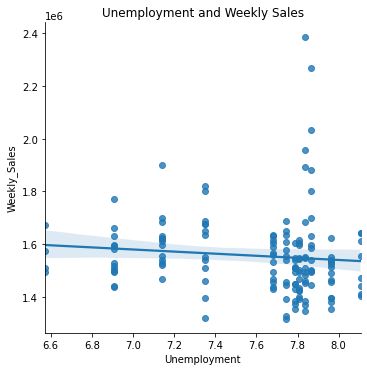

In [40]:
#Plot scatterplot with trendline.
sns.lmplot(data = store_one, x = 'Unemployment', y = 'Weekly_Sales')
plt.title("Unemployment and Weekly Sales");

The correlation coefficient between `Unemployment` and `Weekly_Sales` is about -0.10 which is a very weak negative correlation. 

## 2.6. Summary of Exploration<a name='sum_explor'></a>

The variables that are most postively correlated with `Weekly_Sales` are the `Holiday_Flag`, and `CPI`. The variable that is most negatively correlated with `Weekly_Sales` is `Temperature`. All variables are weakly correlated. 

## 3. Defining Mean Absolute Percent Deviation for Forecasts<a name='mapd_def'></a>

In [19]:
def mapd(demand, forecast):
    abs_sum_list = []
    for demand_value, forecast_value in zip(demand, forecast):
        abs_sum_list.append(abs(demand_value - forecast_value))
    return sum(abs_sum_list) / sum(demand)

## 4. Simple Moving Average<a name='sma'></a>

In order to calculate the moving average we must select what duration we want to use. For this project we will use the previous 3 weeks to calculate the next week in the training store_one. This method of forecasting is the simpliest of all methods and simply takes the sum of the previous 3 weeks and divides by 3, which is the number of weeks. 

In [20]:
store_one.head(107)

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,2010-05-02,1643690.90,0,42.31,2.57,211.10,8.11
1,2010-12-02,1641957.44,1,38.51,2.55,211.24,8.11
2,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11
3,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11
4,2010-05-03,1554806.68,0,46.50,2.62,211.35,8.11
...,...,...,...,...,...,...,...
102,2012-01-20,1394393.84,0,54.11,3.27,219.99,7.35
103,2012-01-27,1319325.59,0,54.26,3.29,220.08,7.35
104,2012-03-02,1636339.65,0,56.55,3.36,220.17,7.35
105,2012-10-02,1802477.43,1,48.02,3.41,220.27,7.35


In [21]:
#Define Simple Moving Average
def sma(week_1_sales, week_2_sales, week_3_sales):
    sum_sales = sum([week_1_sales, week_2_sales, week_3_sales])
    return sum_sales / 3

In [22]:
store_one['lag1'] = store_one.shift(1)['Weekly_Sales']
store_one['lag2'] = store_one.shift(2)['Weekly_Sales']
store_one['lag3'] = store_one.shift(3)['Weekly_Sales']
store_one['sma'] = sma(store_one['lag1'], store_one['lag2'], store_one['lag3'])
store_one.head()

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,lag1,lag2,lag3,sma
0,2010-05-02,1643690.90,0,42.31,2.57,211.10,8.11,NaN,NaN,NaN,NaN
1,2010-12-02,1641957.44,1,38.51,2.55,211.24,8.11,1643690.90,NaN,NaN,NaN
2,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,1641957.44,1643690.90,NaN,NaN
3,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,1611968.17,1641957.44,1643690.90,1632538.84
4,2010-05-03,1554806.68,0,46.50,2.62,211.35,8.11,1409727.59,1611968.17,1641957.44,1554551.07


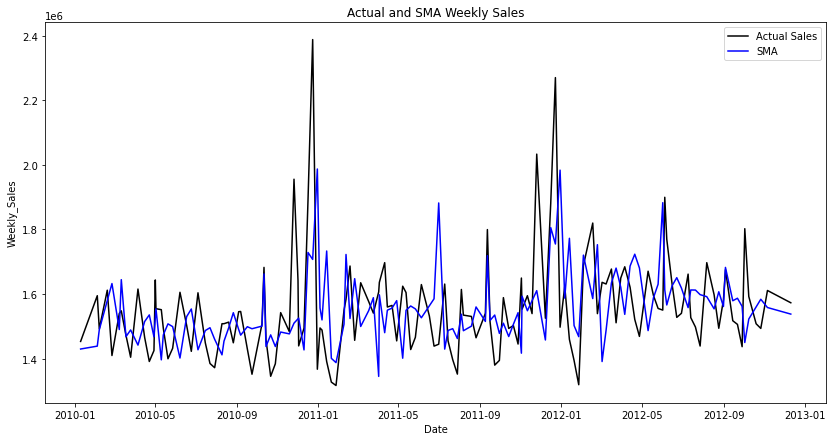

In [23]:
plt.figure(figsize = (14, 7))
sns.lineplot(data = store_one, x = 'Date', y = 'Weekly_Sales', color = 'black')
sns.lineplot(data = store_one, x = 'Date', y = 'sma', color = 'blue')
plt.legend(["Actual Sales", 'SMA'])
plt.title('Actual and SMA Weekly Sales');

In [24]:
sma_mapd = mapd(store_one['Weekly_Sales'][3:], store_one['sma'][3:])
print(sma_mapd)

0.07733307062254748


The mean absolute percent deviation for simple moving average forecastng is about 7.7%. This is not too bad considering how simple the method is. 

## 5. Weighted Moving Average<a name='wma'></a>

For weighted moving average we will define a function for forecasting and like the simple moving average we will be consistent in order to compare methods by forecasting over the same period, i.e. weeks 107 through 111.

In [25]:
store_one.head()

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,lag1,lag2,lag3,sma
0,2010-05-02,1643690.90,0,42.31,2.57,211.10,8.11,NaN,NaN,NaN,NaN
1,2010-12-02,1641957.44,1,38.51,2.55,211.24,8.11,1643690.90,NaN,NaN,NaN
2,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,1641957.44,1643690.90,NaN,NaN
3,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,1611968.17,1641957.44,1643690.90,1632538.84
4,2010-05-03,1554806.68,0,46.50,2.62,211.35,8.11,1409727.59,1611968.17,1641957.44,1554551.07


In [26]:
#Define Weighted Moving Average
def wma(week_1_sales, week_2_sales, week_3_sales):
    return sum([0.3 * week_1_sales, 0.3 * week_2_sales, 
                0.40 * week_3_sales])

In [27]:
store_one['wma'] = wma(store_one['lag1'], store_one['lag2'], store_one['lag3'])
store_one.head()

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,lag1,lag2,lag3,sma,wma
0,2010-05-02,1643690.90,0,42.31,2.57,211.10,8.11,NaN,NaN,NaN,NaN,NaN
1,2010-12-02,1641957.44,1,38.51,2.55,211.24,8.11,1643690.90,NaN,NaN,NaN,NaN
2,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,1641957.44,1643690.90,NaN,NaN,NaN
3,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,1611968.17,1641957.44,1643690.90,1632538.84,1633654.04
4,2010-05-03,1554806.68,0,46.50,2.62,211.35,8.11,1409727.59,1611968.17,1641957.44,1554551.07,1563291.70


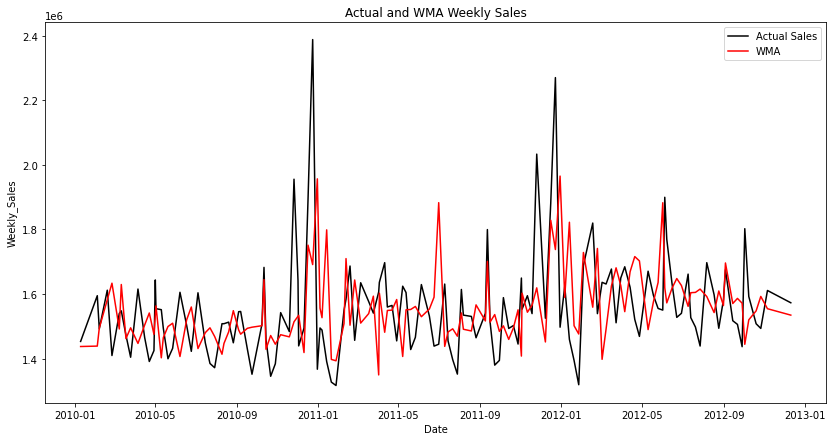

In [28]:
plt.figure(figsize = (14, 7))
sns.lineplot(data = store_one, x = 'Date', y = 'Weekly_Sales', color = 'black')
sns.lineplot(data = store_one, x = 'Date', y = 'wma', color = 'red')
plt.legend(["Actual Sales", 'WMA'])
plt.title('Actual and WMA Weekly Sales');

In [29]:
wma_mapd = mapd(store_one['Weekly_Sales'][3:], store_one['wma'][3:])
print(wma_mapd)

0.07845117755316204


The weighted moving average with weights of 0.3, 0.3, and 0.4 bring an mean absolute percent deviation of about 7.8%%, which is slightly worse than the simple moving average at 7.7%. It may be possible with trial and error to get a better fit.  

## 6. Exponentially Weighted Mean<a name='ewm'></a>

For calculating the exponentially weighted mean we will use pandas built int ewm function with a span of 3 (span is the number of previous observations). 

In [30]:
store_one['ewm'] = store_one['lag1'].ewm(span = 3).mean()
store_one.head()

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,lag1,lag2,lag3,sma,wma,ewm
0,2010-05-02,1643690.90,0,42.31,2.57,211.10,8.11,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-12-02,1641957.44,1,38.51,2.55,211.24,8.11,1643690.90,NaN,NaN,NaN,NaN,1643690.90
2,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,1641957.44,1643690.90,NaN,NaN,NaN,1642535.26
3,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,1611968.17,1641957.44,1643690.90,1632538.84,1633654.04,1625068.35
4,2010-05-03,1554806.68,0,46.50,2.62,211.35,8.11,1409727.59,1611968.17,1641957.44,1554551.07,1563291.70,1510219.95


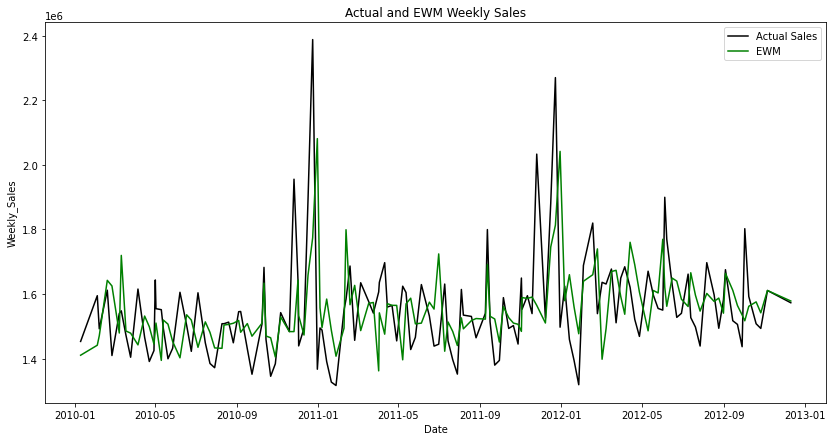

In [31]:
plt.figure(figsize = (14, 7))
sns.lineplot(data = store_one, x = 'Date', y = 'Weekly_Sales', color = 'black')
sns.lineplot(data = store_one, x = 'Date', y = 'ewm', color = 'green')
plt.legend(["Actual Sales", 'EWM'])
plt.title('Actual and EWM Weekly Sales');

In [32]:
es_mapd = mapd(store_one['Weekly_Sales'][1:], store_one['ewm'][1:])
print(es_mapd)

0.07106487639641272


The mean absolute percent deviation for exponentially weighted mean is about 7.1%, which is better than the moving average calculations. It may be possible to get an even better fit with some trial and error for the spans.

## 8. Summary<a name='sum'></a>

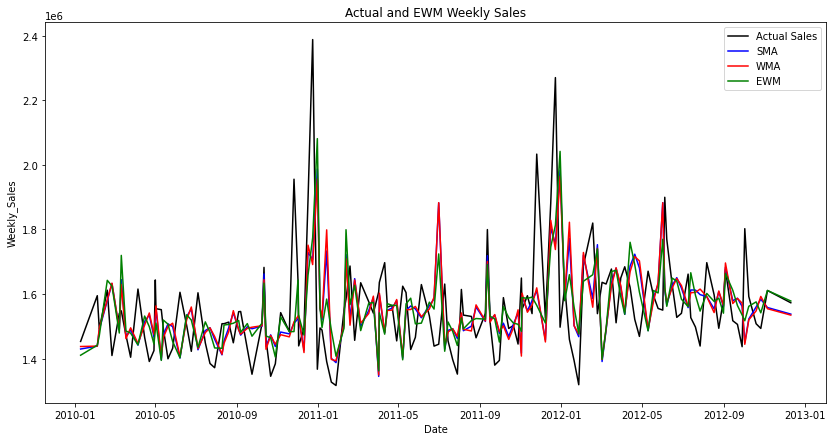

In [33]:
plt.figure(figsize = (14, 7))
sns.lineplot(data = store_one, x = 'Date', y = 'Weekly_Sales', color = 'black')
sns.lineplot(data = store_one, x = 'Date', y = 'sma', color = 'blue')
sns.lineplot(data = store_one, x = 'Date', y = 'wma', color = 'red')
sns.lineplot(data = store_one, x = 'Date', y = 'ewm', color = 'green')
plt.legend(["Actual Sales", 'SMA', 'WMA', 'EWM'])
plt.title('Actual and EWM Weekly Sales');

During the course of this notebook we have explored sales data and performed some simple forecasting methods commonly used in business. Out of the methods we have employed it appears that exponentially weighted mean performed the best, although weighted moving average could have been adjusted to perhaps improve lower its MAPD score further. <br> 